<a href="https://colab.research.google.com/github/amir-asari/SEBB4083-Assignment2023/blob/main/Group_5_Assignment_2(LogisticRegression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Group Assignment 2 (5%)
### Total marks: 30

### Group No.5

###Group Members:
1)Akmal Fikri Bin Yahaya

2)Chung Rui Yang

3)Mosa Muntadher Mohammed Mosa

4)Teh Yee Bin

5)Tie Heng En


In this assignment, you need to apply logistic regression using Prima Indian Diabetis dataset. Note: You can use any appropriate Python libraries for this assignment, such as pandas, numpy, scikit-learn, matplotlib, and seaborn.

####(Step 1) Load the Pima Indian Diabetes dataset into Python using pandas library [2 marks]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve,precision_recall_curve

In [ ]:
# Import dataset
# show some examples of data
diabetes_data = pd.read_csv('diabetes.csv')
pd.concat([diabetes_data.head(), diabetes_data.tail()])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

####(Step 2) Preprocess the data to clean, remove null values, and normalize if needed. [4 marks]

In [ ]:
# Check any missing values in the datasheet
diabetes_data.isnull().any()
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Find pairwise correlation of all columns
corr = diabetes_data.corr()
corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
# Drop "BloodPressure" and "SkinThickness" as they have least correlation with diabetes outcome
# Show data again to double confirm any missing values
diabetes_data.drop('BloodPressure', axis=1, inplace=True)
diabetes_data.drop('SkinThickness', axis=1, inplace=True)
diabetes_data.info()
diabetes_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   Insulin                   768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


####(Step 3) Split the dataset into training and testing subsets. Use 1) 50:50; 2)70:30; 3)80:20; and 4)90:10 ratio of training to testing data. [4 marks]

In [ ]:
# Split the data into independent(X) and dependent(y) variables
# X includes "Pregnancies", "Glucose", "Insulin", "BMI", "DiabetesPedigreeFunction" and "Age"
# y includes "Outcome"
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

In [ ]:
# Feature scale to normalize X to enable them in same range
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# Split datasheet into 50% training and 50% testing subsets
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.50, random_state=1)

print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(384, 6)
(384, 6)
(384,)
(384,)


In [ ]:
# Split datasheet into 70% training and 30% testing subsets
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.30, random_state=1)

print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(537, 6)
(231, 6)
(537,)
(231,)


In [ ]:
# Split datasheet into 80% training and 20% testing subsets
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.20, random_state=1)

print(X3_train.shape)
print(X3_test.shape)
print(y3_train.shape)
print(y3_test.shape)

(614, 6)
(154, 6)
(614,)
(154,)


In [ ]:
# Split datasheet into 90% training and 10% testing subsets
from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size=0.10, random_state=1)

print(X4_train.shape)
print(X4_test.shape)
print(y4_train.shape)
print(y4_test.shape)

(691, 6)
(77, 6)
(691,)
(77,)


####(Step 4) Perform logistic regression on the training data and show the training accuracy. [4 marks]

In [ ]:
# By using 1st Training of splited 50:50 ratio
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression()
classifier1.fit(X1_train, y1_train)
X1_pred = classifier1.predict (X1_train)
train1_accuracy = (X1_pred == y1_train).mean()
print("Training accuracy for 1st training of splited 50:50 ratio:", train1_accuracy)

Training accuracy for 1st training of splited 50:50 ratio: 0.7760416666666666


In [ ]:
# By using 2st Training of splited 70:30 ratio
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression()
classifier2.fit(X2_train, y2_train)
X2_pred = classifier2.predict (X2_train)
train2_accuracy = (X2_pred == y2_train).mean()
print("Training accuracy for 2nd training of splited 70:30 ratio:", train2_accuracy)

Training accuracy for 2nd training of splited 70:30 ratio: 0.7672253258845437


In [ ]:
# By using 3rd Training of splited 80:20 ratio
from sklearn.linear_model import LogisticRegression
classifier3 = LogisticRegression()
classifier3.fit(X3_train, y3_train)
X3_pred = classifier3.predict (X3_train)
train3_accuracy = (X3_pred == y3_train).mean()
print("Training accuracy for 3rd training of splited 80:20 ratio:", train3_accuracy)

Training accuracy for 3rd training of splited 80:20 ratio: 0.7736156351791531


In [ ]:
# By using 4th Training of splited 90:10 ratio
from sklearn.linear_model import LogisticRegression
classifier4 = LogisticRegression()
classifier4.fit(X4_train, y4_train)
X4_pred = classifier4.predict (X4_train)
train4_accuracy = (X4_pred == y4_train).mean()
print("Training accuracy for 4th training of splited 90:10 ratio:", train4_accuracy)

Training accuracy for 4th training of splited 90:10 ratio: 0.7785817655571635


####(Step 5) Use the trained model to make predictions on the testing data. [4 marks]

In [ ]:
# Perform testing
# By using 1st Training of splited 50:50 ratio
y1_pred = classifier1.predict(X1_test)
test1_accuracy = (y1_pred == y1_test).mean()
print("Testing accuracy for 1st training of splited 50:50 ratio:", test1_accuracy)

Testing accuracy for 1st training of splited 50:50 ratio: 0.7682291666666666


In [ ]:
# Perform testing
# By using 2nd Training of splited 70:30 ratio
y2_pred = classifier2.predict(X2_test)
test2_accuracy = (y2_pred == y2_test).mean()
print("Testing accuracy for 2nd training of splited 70:30 ratio:", test2_accuracy)

Testing accuracy for 2nd training of splited 70:30 ratio: 0.7748917748917749


In [ ]:
# Perform testing
# By using 3rd Training of splited 80:20 ratio
y3_pred = classifier3.predict(X3_test)
test3_accuracy = (y3_pred == y3_test).mean()
print("Testing accuracy for 3rd training of splited 80:20 ratio:", test3_accuracy)

Testing accuracy for 3rd training of splited 80:20 ratio: 0.7597402597402597


In [ ]:
# Perform testing
# By using 4th Training of splited 90:10 ratio
y4_pred = classifier4.predict(X4_test)
test4_accuracy = (y4_pred == y4_test).mean()
print("Testing accuracy for 4th training of splited 90:10 ratio:", test4_accuracy)

Testing accuracy for 4th training of splited 90:10 ratio: 0.7532467532467533


####(Step 6) Evaluate the model's performance using appropriate metrics such as accuracy, true positive rate and true negative rate. [8 marks]

Using **'*accuracy_score, precision_score, roc_auc_score, and f1_score*' from '*sklearn.metrics*'**

In [ ]:
#Accuracy using 'accuracy_score' from 'sklearn.metrics'
accuracy1 = accuracy_score(y1_test, y1_pred)
accuracy2 = accuracy_score(y2_test, y2_pred)
accuracy3 = accuracy_score(y3_test, y3_pred)
accuracy4 = accuracy_score(y4_test, y4_pred)


#Precision using 'precision_score' from 'sklearn.metrics'
precision1 = precision_score(y1_test, y1_pred)
precision2 = precision_score(y2_test, y2_pred)
precision3 = precision_score(y3_test, y3_pred)
precision4 = precision_score(y4_test, y4_pred)


#AUC-ROC using 'roc_auc_score' from 'sklearn.metrics'
AUC_ROC1 = roc_auc_score(y1_test,y1_pred)
AUC_ROC2 = roc_auc_score(y2_test,y2_pred)
AUC_ROC3 = roc_auc_score(y3_test,y3_pred)
AUC_ROC4 = roc_auc_score(y4_test,y4_pred)


#F1 Score using 'f1_score' from 'sklearn.metrics'
f1_score1 = f1_score(y1_test, y1_pred)
f1_score2 = f1_score(y2_test, y2_pred)
f1_score3 = f1_score(y3_test, y3_pred)
f1_score4 = f1_score(y4_test, y4_pred)


#print accuracy
print("Accuracy for model 1 is:", accuracy1)
print("Accuracy for model 2 is:", accuracy2)
print("Accuracy for model 3 is:", accuracy3)
print("Accuracy for model 4 is:", accuracy4)
print("  ")

#print precision
print("Precision for model 1 is:", precision1)
print("Precision for model 2 is:", precision2)
print("Precision for model 3 is:", precision3)
print("Precision for model 4 is:", precision4)
print("  ")

#print AUC-ROC
print("AUC-ROC for model 1 is:", AUC_ROC1)
print("AUC-ROC for model 2 is:", AUC_ROC2)
print("AUC-ROC for model 3 is:", AUC_ROC3)
print("AUC-ROC for model 4 is:", AUC_ROC4)
print("  ")
print("PS/ AUC-ROC > 0.5: An AUC-ROC value greater than 0.5 indicates that the model performs better than random guessing. \n The higher the value, the better the model's performance.")
print("  ")

#print F1 Score
print("F1 Score for model 1 is:", f1_score1)
print("F1 Score for model 2 is:", f1_score2)
print("F1 Score for model 3 is:", f1_score3)
print("F1 Score for model 4 is:", f1_score4)
print("  ")
print("PS/ The F1 score ranges from 0 to 1, with a higher value indicating better model performance. ")

Accuracy for model 1 is: 0.7682291666666666
Accuracy for model 2 is: 0.7748917748917749
Accuracy for model 3 is: 0.7597402597402597
Accuracy for model 4 is: 0.7532467532467533
  
Precision for model 1 is: 0.7474747474747475
Precision for model 2 is: 0.7619047619047619
Precision for model 3 is: 0.7142857142857143
Precision for model 4 is: 0.7083333333333334
  
AUC-ROC for model 1 is: 0.7173029338989043
AUC-ROC for model 2 is: 0.730983078162772
AUC-ROC for model 3 is: 0.7121212121212122
AUC-ROC for model 4 is: 0.7201867816091954
  
PS/ AUC-ROC > 0.5: An AUC-ROC value greater than 0.5 indicates that the model performs better than random guessing. 
 The higher the value, the better the model's performance.
  
F1 Score for model 1 is: 0.6244725738396625
F1 Score for model 2 is: 0.6486486486486486
F1 Score for model 3 is: 0.6185567010309277
F1 Score for model 4 is: 0.6415094339622641
  
PS/ The F1 score ranges from 0 to 1, with a higher value indicating better model performance. 


Using **confusion_matrix**


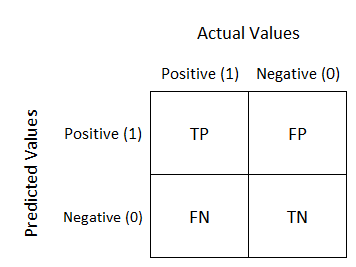

>


In [ ]:
#getting true/false posestive/negative using confusion_matrix
tn1, fp1, fn1, tp1 = confusion_matrix(y1_test, y1_pred).ravel()
tn2, fp2, fn2, tp2 = confusion_matrix(y2_test, y2_pred).ravel()
tn3, fp3, fn3, tp3 = confusion_matrix(y3_test, y3_pred).ravel()
tn4, fp4, fn4, tp4 = confusion_matrix(y4_test, y4_pred).ravel()


#Accuracy = (TP+TN)/(TN+TP+FN+FP)     //////////////  Accuracy  //////////////
accuracy1 = (tp1 + tn1)/(tp1 + tn1 + fp1 + fn1)
accuracy2 = (tp2 + tn2)/(tp2 + tn2 + fp2 + fn2)
accuracy3 = (tp3 + tn3)/(tp3 + tn3 + fp3 + fn3)
accuracy4 = (tp4 + tn4)/(tp4 + tn4 + fp4 + fn4)


#TPR = TP/(TP+FN)    //////////////   sensitivity: True Positive Ratio   //////////////
#TNR = TN/(TN+FP)    //////////////   specificity: True Negative Ratio   //////////////
tpr1 = tp1 / (tp1 + fn1)
tnr1 = tn1 / (tn1 + fp1)
tpr2 = tp2 / (tp2 + fn2)
tnr2 = tn2 / (tn2 + fp2)
tpr3 = tp3 / (tp3 + fn3)
tnr3 = tn3 / (tn3 + fp3)
tpr4 = tp4 / (tp4 + fn4)
tnr4 = tn4 / (tn4 + fp4)


#print accuracy
print("Accuracy for model 1 is:", accuracy1)
print("Accuracy for model 2 is:", accuracy2)
print("Accuracy for model 3 is:", accuracy3)
print("Accuracy for model 4 is:", accuracy4)
print("  ")

#print sensitivity
print("Sensitivity (TPR) for model 1 is:", tpr1)
print("Sensitivity (TPR) for model 2 is:", tpr2)
print("Sensitivity (TPR) for model 3 is:", tpr3)
print("Sensitivity (TPR) for model 4 is:", tpr4)
print("  ")

#print specificity
print("Specificity (TNR) for model 1 is:", tnr1)
print("Specificity (TNR) for model 2 is:", tnr2)
print("Specificity (TNR) for model 3 is:", tnr3)
print("Specificity (TNR) for model 4 is:", tnr4)

Accuracy for model 1 is: 0.7682291666666666
Accuracy for model 2 is: 0.7748917748917749
Accuracy for model 3 is: 0.7597402597402597
Accuracy for model 4 is: 0.7532467532467533
  
Sensitivity (TPR) for model 1 is: 0.5362318840579711
Sensitivity (TPR) for model 2 is: 0.5647058823529412
Sensitivity (TPR) for model 3 is: 0.5454545454545454
Sensitivity (TPR) for model 4 is: 0.5862068965517241
  
Specificity (TNR) for model 1 is: 0.8983739837398373
Specificity (TNR) for model 2 is: 0.8972602739726028
Specificity (TNR) for model 3 is: 0.8787878787878788
Specificity (TNR) for model 4 is: 0.8541666666666666


####(Step 7) Visualize the model's performance using appropriate charts such as a confusion matrix. [4 marks]

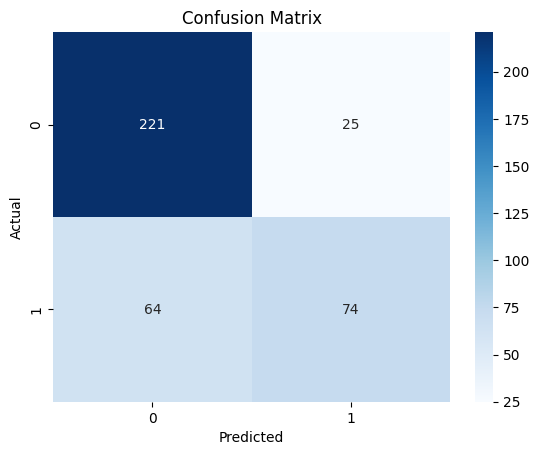

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the confusion matrix
cm = confusion_matrix(y1_test, y1_pred)

# Creating a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Adding labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

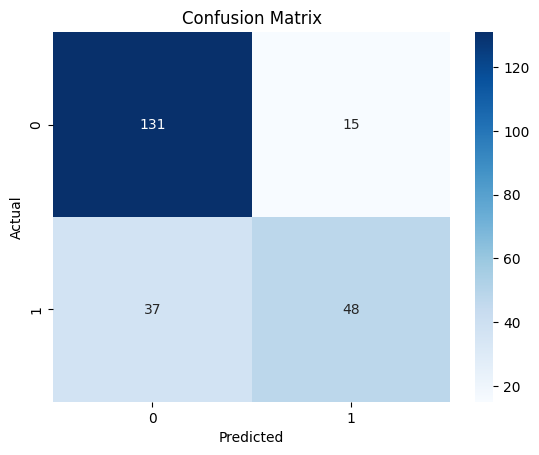

In [ ]:
# Creating the confusion matrix
cm = confusion_matrix(y2_test, y2_pred)

# Creating a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Adding labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


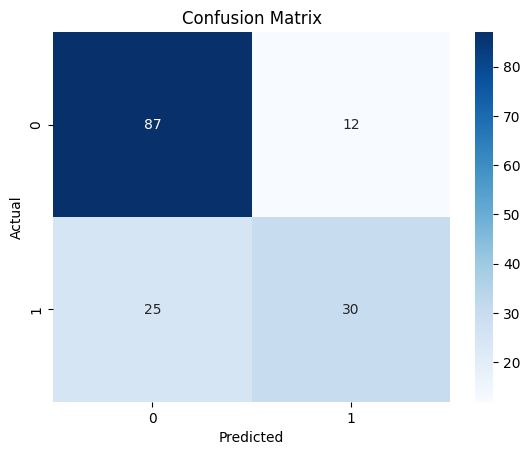

In [ ]:
# Creating the confusion matrix
cm = confusion_matrix(y3_test, y3_pred)

# Creating a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Adding labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


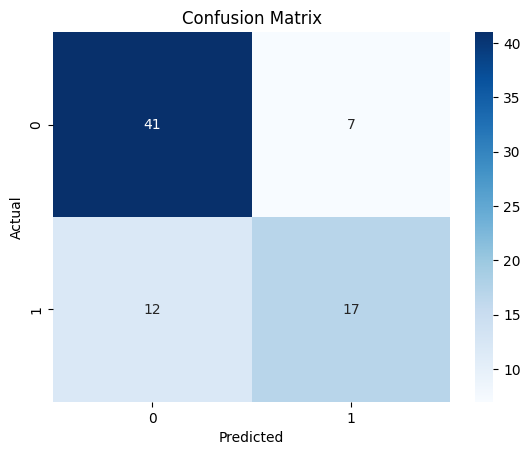

In [ ]:
# Creating the confusion matrix
cm = confusion_matrix(y4_test, y4_pred)

# Creating a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Adding labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

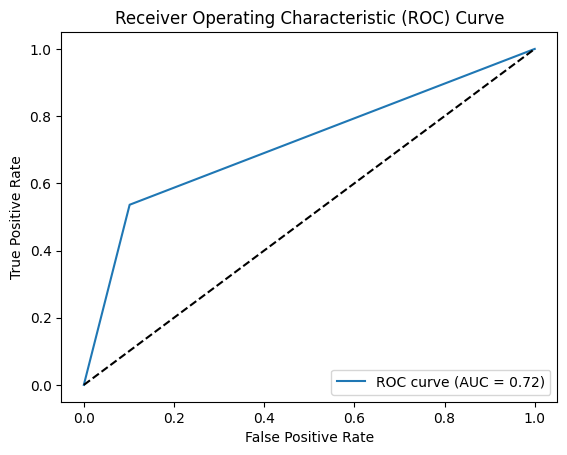

In [ ]:
# Plot the ROC curve
fpr1, tpr1, thresholds1 = roc_curve(y1_test, y1_pred)
plt.plot(fpr1, tpr1, label='ROC curve (AUC = %0.2f)' % AUC_ROC1)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve1')
plt.legend(loc='lower right')
plt.show()

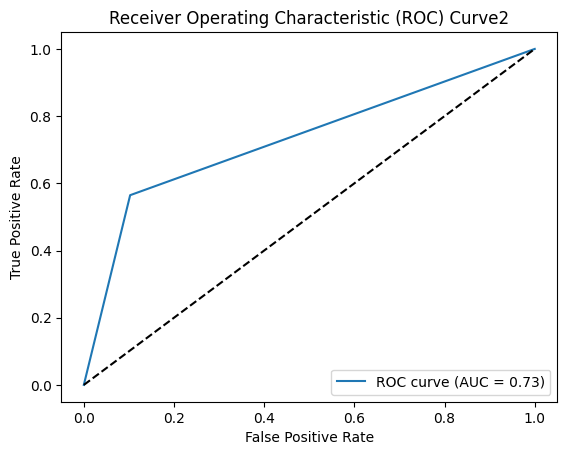

In [ ]:
# Plot the ROC curve
fpr2, tpr2, thresholds2 = roc_curve(y2_test, y2_pred)
plt.plot(fpr2, tpr2, label='ROC curve (AUC = %0.2f)' % AUC_ROC2)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve2')
plt.legend(loc='lower right')
plt.show()

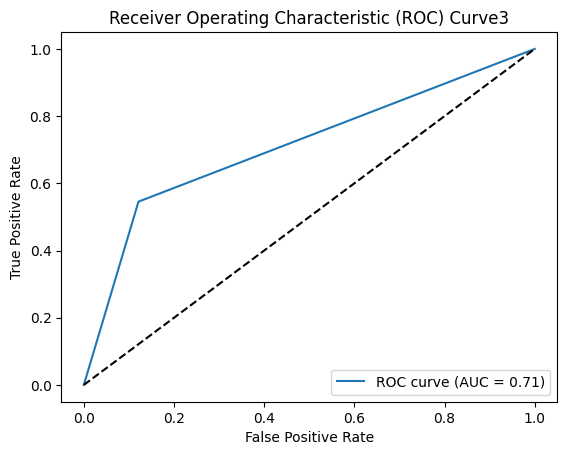

In [ ]:
# Plot the ROC curve
fpr3, tpr3, thresholds3 = roc_curve(y3_test, y3_pred)
plt.plot(fpr3, tpr3, label='ROC curve (AUC = %0.2f)' % AUC_ROC3)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve3')
plt.legend(loc='lower right')
plt.show()

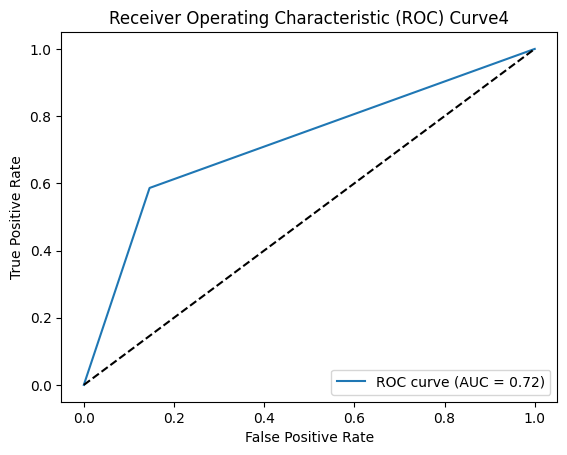

In [ ]:
# Plot the ROC curve
fpr4, tpr4, thresholds4 = roc_curve(y4_test, y4_pred)
plt.plot(fpr4, tpr4, label='ROC curve (AUC = %0.2f)' % AUC_ROC4)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve4')
plt.legend(loc='lower right')
plt.show()

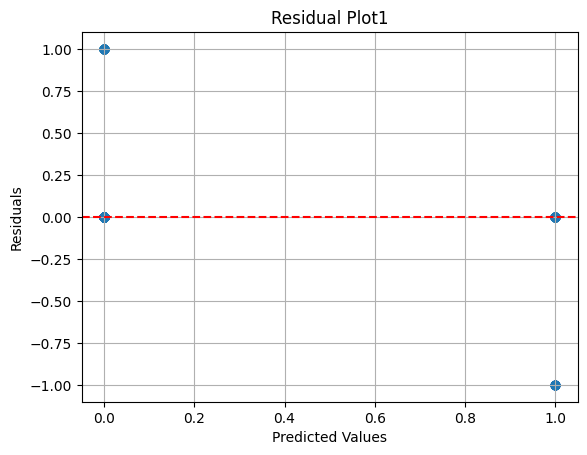

In [ ]:
residuals1 = y1_test - y1_pred

# Plot the residuals
plt.scatter(y1_pred, residuals1)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot1')
plt.grid()
plt.show()

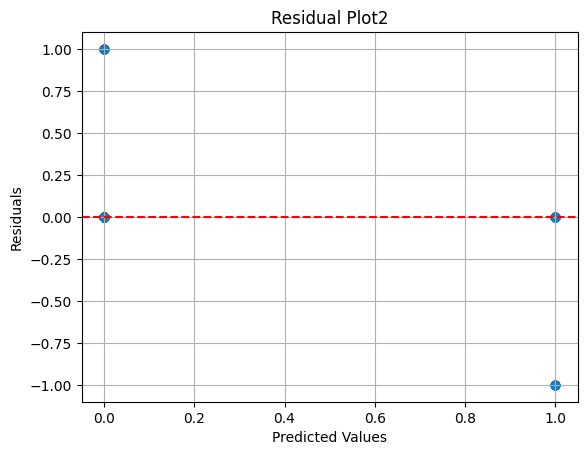

In [ ]:
residuals2 = y2_test - y2_pred

# Plot the residuals
plt.scatter(y2_pred, residuals2)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot2')
plt.grid()
plt.show()

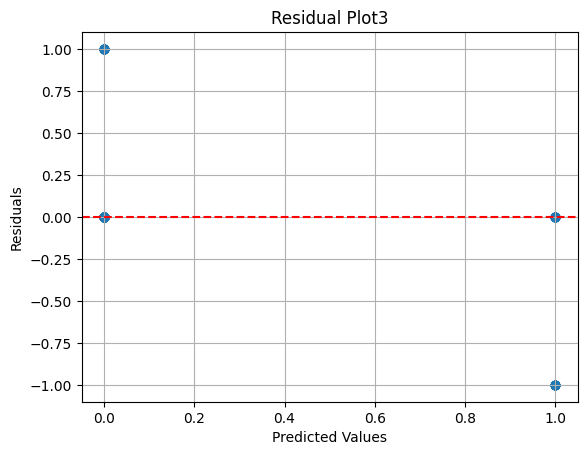

In [ ]:
residuals3= y3_test - y3_pred

# Plot the residuals
plt.scatter(y3_pred, residuals3)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot3')
plt.grid()
plt.show()

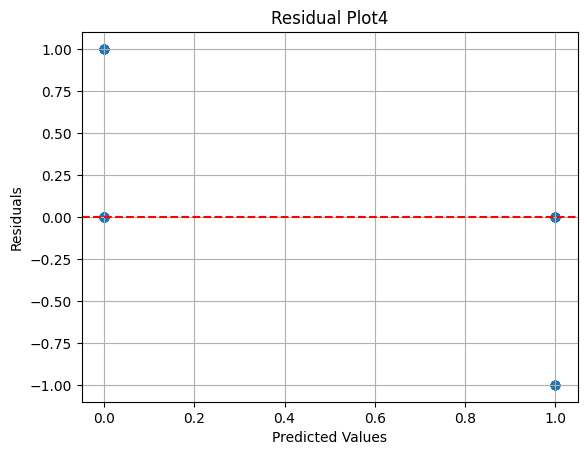

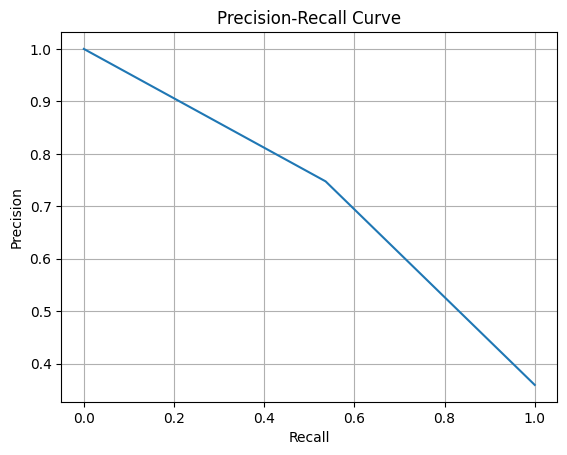

In [ ]:
precision1, recall1, thresholds1 = precision_recall_curve(y1_test, y1_pred)

# Plot the Precision-Recall curve
plt.plot(recall1, precision1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve1')
plt.grid()
plt.show()

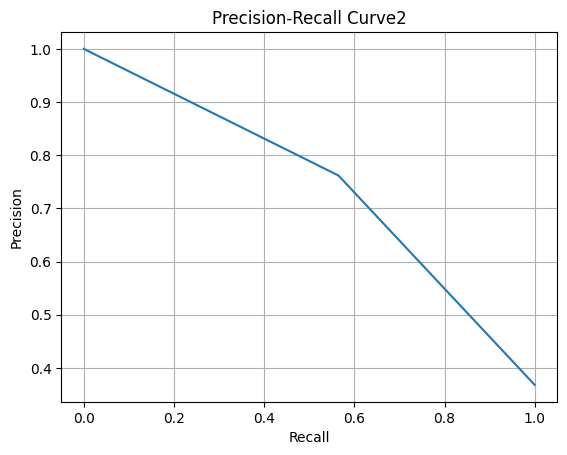

In [ ]:
precision2, recall2, thresholds2 = precision_recall_curve(y2_test, y2_pred)

# Plot the Precision-Recall curve
plt.plot(recall2, precision2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve2')
plt.grid()
plt.show()

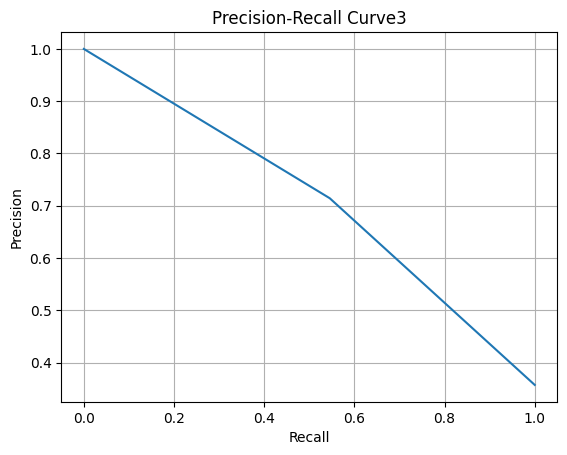

In [ ]:
precision3, recall3, thresholds3 = precision_recall_curve(y3_test, y3_pred)

# Plot the Precision-Recall curve
plt.plot(recall3, precision3)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve3')
plt.grid()
plt.show()

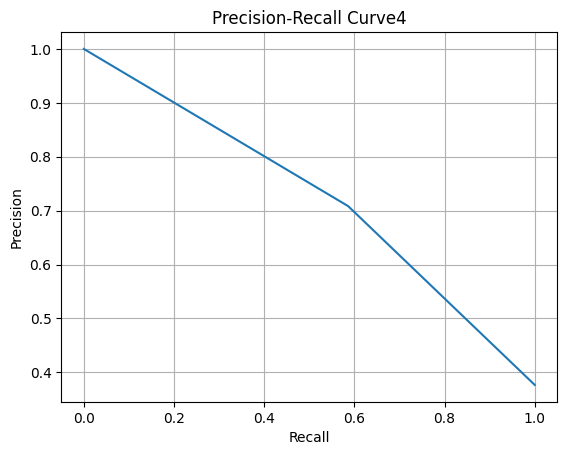

In [ ]:
precision4, recall4, thresholds4 = precision_recall_curve(y4_test, y4_pred)

# Plot the Precision-Recall curve
plt.plot(recall4, precision4)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve4')
plt.grid()
plt.show()